# Workflow
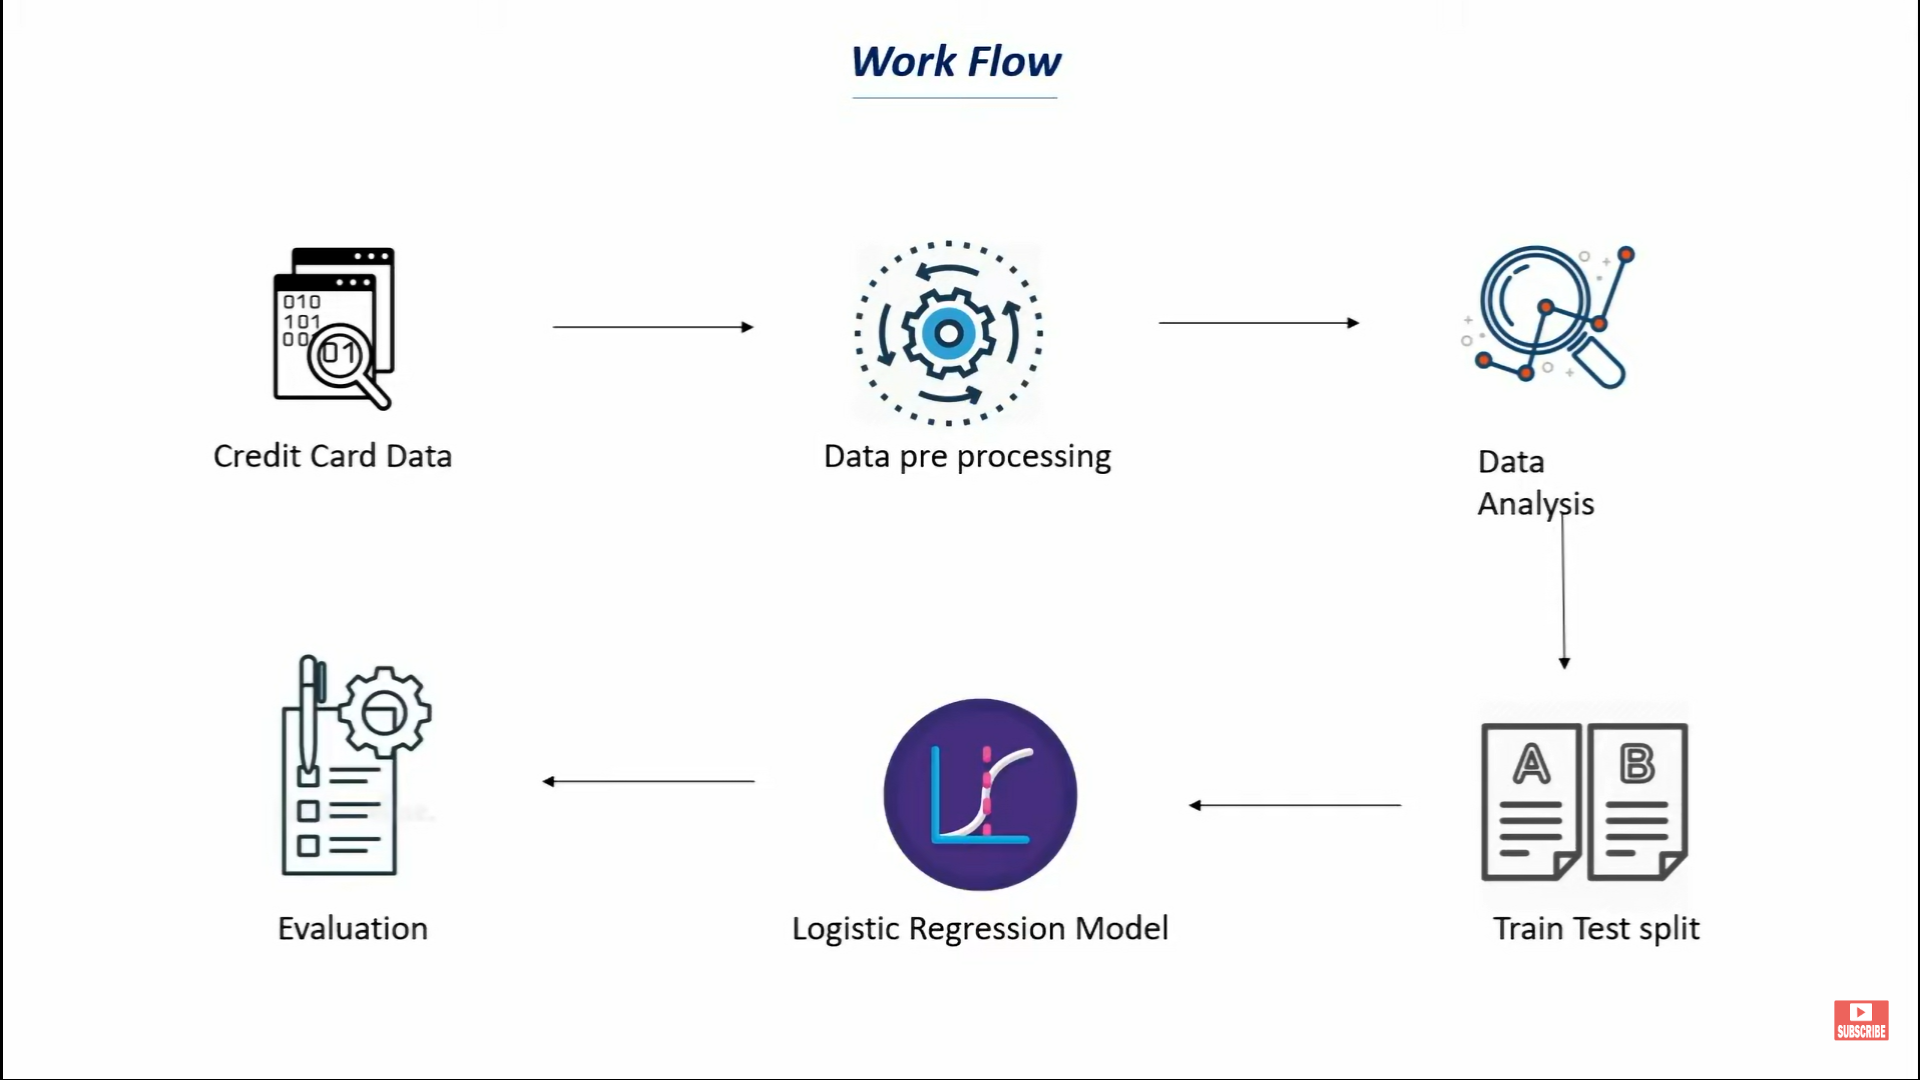

In [5]:
# Importing dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

**importing dataset into Pandas dataframe**

In [6]:
credit_card_data= pd.read_csv('creditcard.csv')
# First 5 rows of Dataset
credit_card_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**It contains only numerical input variables which are the result of a # PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**


# Information about dataset
**The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.**

**Label '0' is legit transaction**
****
**Label '1' is Fraudent Transaction**

# PCA and Dimensionality Reduction

https://youtu.be/lb8-J4PREu0?si=vBbPOx1y6bwVEB8X



In [7]:
+

#last 5 rows of dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
#Data set Information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Checking the number of missing value in each coloumn
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Good we dont have any missing value in our dataset , if present then we have to apply the method Imputation to handling those missing value but fortunately or dataset doesnt have any missing value so its great**

In [10]:
# distribution of legit and fraudent transaction
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# This Dataset is highly unbalanced
**0-->Normal transcation**
**1-->Fraudent transaction**

In [11]:
# separating the Data for analysis
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [12]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [13]:
# statisticall measure of Data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
# Compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under sampling
**Build sample dataset containing similar ditribution of normal and fraudent transaction**
****
**NUmber of Fraudent Transaction-->492**

In [16]:
legit_sample=legit.sample(n=492)
## it will Randomly take the sample , not by line by line from legit data frame 


# Conatenating Two Dataframes


In [17]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)
# if we give axis value =0 fraud sample entries will be concatenaed below the legit_sample values


In [18]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
252764,155961.0,-0.265423,0.984447,0.192305,-0.242340,0.764958,-0.454399,0.882794,-0.216985,-0.518770,...,0.433313,1.274144,-0.357262,-0.336483,-0.249858,-0.033496,-0.088341,0.188374,2.28,0
7211,9473.0,-1.164451,0.153137,2.409536,0.103744,-0.474161,1.060502,0.638955,0.289037,0.923192,...,0.388722,0.967852,0.237285,-0.368938,0.045107,-0.454748,0.048814,0.124223,228.00,0
220940,142364.0,1.829172,-0.574930,-0.334911,0.468296,-0.141471,1.046528,-0.850182,0.379846,1.179640,...,0.259335,1.083316,0.219690,-1.060396,-0.449760,0.488287,0.048399,-0.053707,20.50,0
144138,85892.0,1.229202,0.226235,-0.095860,0.952038,0.107469,-0.471738,0.256926,-0.194080,0.023587,...,-0.003469,-0.041610,-0.237531,-0.438957,0.788179,-0.280731,0.005896,0.018719,42.81,0
185380,126642.0,0.027097,1.395385,-0.456340,3.280538,3.136251,4.739291,0.179608,1.087031,-2.165912,...,-0.197616,-0.499877,0.154848,0.650503,-0.897328,0.057797,0.489265,0.274621,10.47,0


In [19]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [20]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [21]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97322.646341,-0.191918,0.023917,-0.022952,0.027628,0.159503,-0.027147,-0.001590,-0.021623,0.031207,...,0.061022,-0.017880,0.032181,0.005218,-0.017074,-0.058203,-0.004749,0.018785,0.001854,92.736280
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Splitting the data into features and target**

In [22]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']
print(X.head())


            Time        V1        V2        V3        V4        V5        V6  \
252764  155961.0 -0.265423  0.984447  0.192305 -0.242340  0.764958 -0.454399   
7211      9473.0 -1.164451  0.153137  2.409536  0.103744 -0.474161  1.060502   
220940  142364.0  1.829172 -0.574930 -0.334911  0.468296 -0.141471  1.046528   
144138   85892.0  1.229202  0.226235 -0.095860  0.952038  0.107469 -0.471738   
185380  126642.0  0.027097  1.395385 -0.456340  3.280538  3.136251  4.739291   

              V7        V8        V9  ...       V20       V21       V22  \
252764  0.882794 -0.216985 -0.518770  ... -0.026645  0.433313  1.274144   
7211    0.638955  0.289037  0.923192  ...  0.338524  0.388722  0.967852   
220940 -0.850182  0.379846  1.179640  ... -0.253989  0.259335  1.083316   
144138  0.256926 -0.194080  0.023587  ... -0.033399 -0.003469 -0.041610   
185380  0.179608  1.087031 -2.165912  ...  0.358868 -0.197616 -0.499877   

             V23       V24       V25       V26       V27       V28  

In [23]:
print(Y)

252764    0
7211      0
220940    0
144138    0
185380    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# Split the Data into training data and Testing data

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
## Stratify meaning: _______
#random state=2 what it implies?_______
print(X.shape,X_test.shape,X_train.shape)

(984, 30) (197, 30) (787, 30)


# Model Training

**Logistic regressin since it is a Binary classification Problem**

In [25]:
#training the Logistic Regression Model with Training data
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

# Model Evaluation
**Accracy_Score**

In [26]:
X_train_prediction=model.predict(X_train)
# the labels that model predict corresponding to the Data will be stored in the x_train_Prediction
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
# here we compare the model predicted label with the actual data label .



In [27]:
print("Accuracy on training Data:  ",training_data_accuracy)

Accuracy on training Data:   0.9440914866581956


In [28]:
# accuracy on test data 
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)


In [29]:
print("Accuracy scoere on testing Data: ",test_data_accuracy)

Accuracy scoere on testing Data:  0.9137055837563451


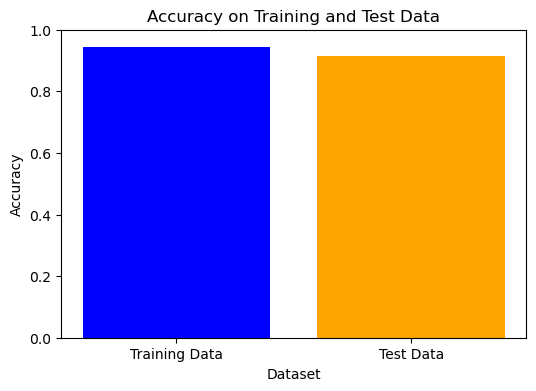

In [30]:
# Plotting the accuracy scores
plt.figure(figsize=(6, 4))
plt.bar(['Training Data', 'Test Data'], [training_data_accuracy, test_data_accuracy], color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy on Training and Test Data')
plt.ylim(0, 1)
plt.show()